In [4]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [5]:
column_names = [
    'id', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title', 
    'state', 'party', 'barely_true_counts', 'false_counts', 'half_true_counts', 
    'mostly_true_counts', 'pants_on_fire_counts', 'context'
]

# Đọc file TSV với tên cột đã xác định
data = pd.read_csv('../Dataset_Original/LIAR/train.tsv', sep='\t', names=column_names, header=None)

# Data overview

In [6]:
# Data exploration
data.head()

,id,label,statement,subject,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [7]:
print(data['label'].value_counts())

label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64


# Missing & duplicate values

In [8]:
data.isnull().sum()

id                         0
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job_title       2898
state                   2210
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

In [9]:
num_unique_values = data['subject'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

3827/10240


In [10]:
# Number of unique values in text
num_unique_values = data['statement'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

10223/10240


In [11]:
# Kiểm tra các giá trị không phải là chuỗi trong cột 'subject'
non_string_subject = data['subject'].apply(lambda x: not isinstance(x, str))
print(data[non_string_subject])
# Kiểm tra và đếm số giá trị không phải chuỗi trong cột 'subject'
non_string_subject_count = non_string_subject.sum()
print("Count of values that not a string value in 'subject':", non_string_subject_count)


             id  label                                          statement  \
2142   638.json  false  The fact is that although we have had a presid...   
9375  1626.json  false  Joe, I keep hearing you every morning talking ...   

     subject speaker speaker_job_title state party  barely_true_counts  \
2142     NaN     NaN               NaN   NaN   NaN                 NaN   
9375     NaN     NaN               NaN   NaN   NaN                 NaN   

      false_counts  half_true_counts  mostly_true_counts  \
2142           NaN               NaN                 NaN   
9375           NaN               NaN                 NaN   

      pants_on_fire_counts context  
2142                   NaN     NaN  
9375                   NaN     NaN  
Count of values that not a string value in 'subject': 2


# Distribution of speaker length

In [12]:
# Kiểm tra các giá trị không phải là chuỗi trong cột 'speaker'
non_string_speaker = data['speaker'].apply(lambda x: not isinstance(x, str))
print(data[non_string_speaker])
# Kiểm tra và đếm số giá trị không phải chuỗi trong cột 'speaker'
non_string_speaker_count = non_string_speaker.sum()
print("Count of values that not a string value in 'speaker':", non_string_speaker_count)


             id  label                                          statement  \
2142   638.json  false  The fact is that although we have had a presid...   
9375  1626.json  false  Joe, I keep hearing you every morning talking ...   

     subject speaker speaker_job_title state party  barely_true_counts  \
2142     NaN     NaN               NaN   NaN   NaN                 NaN   
9375     NaN     NaN               NaN   NaN   NaN                 NaN   

      false_counts  half_true_counts  mostly_true_counts  \
2142           NaN               NaN                 NaN   
9375           NaN               NaN                 NaN   

      pants_on_fire_counts context  
2142                   NaN     NaN  
9375                   NaN     NaN  
Count of values that not a string value in 'speaker': 2


In [13]:
is_string_speakers = data['speaker'].apply(lambda x: isinstance(x, str))
data['speaker_length'] = data['speaker'][is_string_speakers].apply(len)
print(data['speaker_length'].describe())

count    10238.000000
mean        13.822719
std          6.014499
min          3.000000
25%         11.000000
50%         12.000000
75%         14.000000
max         50.000000
Name: speaker_length, dtype: float64


In [14]:
print(data[data['speaker_length']==3]['speaker'])

4136    cnn
Name: speaker, dtype: object


In [15]:
print(data[data['speaker_length']==50]['speaker'])

455      no-60-campaign-against-condom-requirement-adul...
3006     service-employees-international-union-committe...
4034     citizens-michael-mcauliffe-and-house-republica...
4196     service-employees-international-union-committe...
4685     democratic-hispanic-caucus-florida-miami-dade-...
5398     defenders-wildlife-action-fund-defenders-wildl...
6443     oregon-environmental-council-oregon-business-a...
6586     progressive-change-campaign-committee-and-demo...
6650     promote-oregon-leadership-pac-oregon-house-rep...
6859     environmental-justice-league-ri-environmental-...
7593     promote-oregon-leadership-pac-oregon-house-rep...
8681     defenders-wildlife-action-fund-defenders-wildl...
8884     promote-oregon-leadership-pac-oregon-house-rep...
9094     service-employees-international-union-committe...
9260     metropolitan-north-georgia-water-planning-dist...
10054    promote-oregon-leadership-pac-oregon-house-rep...
Name: speaker, dtype: object


# Distribution of statement length

In [16]:
is_string_statements = data['statement'].apply(lambda x: isinstance(x, str))
# Tính độ dài của mỗi statement và thêm vào DataFrame dưới dạng cột mới 'statement_length'
data['statement_length'] = data['statement'][is_string_statements].apply(len)

# In ra các thống kê về độ dài của các tiêu đề
print(data['statement_length'].describe())

count    10240.000000
mean       106.918750
std         59.917722
min         11.000000
25%         73.000000
50%         99.000000
75%        132.250000
max       3192.000000
Name: statement_length, dtype: float64


In [17]:
print(data[data['statement_length']==11]['statement'])

709     On abortion
1014    On abortion
1071    On torture.
6759    On torture.
Name: statement, dtype: object


In [18]:
print(data[data['statement_length']==3204]['statement'])

Series([], Name: statement, dtype: object)


In [19]:
# Define a pattern for JavaScript code
pattern = r'<script.*?</script>'

# Find examples that contain JavaScript code
js_examples = data[data['statement'].str.contains(pattern, regex=True, na=False)]

# Print the first few examples
print(js_examples.head())

Empty DataFrame
Columns: [id, label, statement, subject, speaker, speaker_job_title, state, party, barely_true_counts, false_counts, half_true_counts, mostly_true_counts, pants_on_fire_counts, context, speaker_length, statement_length]
Index: []


In [20]:
# Describe 'sentence_length' for label pants-fire
print(data[data['label'] == 'pants-fire']['statement_length'].describe())

# Describe 'sentence_length' for label false
print(data[data['label'] == 'false']['statement_length'].describe())

# Describe 'sentence_length' for label half-true
print(data[data['label'] == 'half-true']['statement_length'].describe())

# Describe 'sentence_length' for label mostly-true
print(data[data['label'] == 'mostly-true']['statement_length'].describe())

# Describe 'sentence_length' for label true
print(data[data['label'] == 'true']['statement_length'].describe())


count    839.000000
mean     102.334923
std       43.256090
min       16.000000
25%       69.000000
50%       96.000000
75%      128.500000
max      272.000000
Name: statement_length, dtype: float64
count    1995.000000
mean      101.542857
std        63.728168
min        11.000000
25%        69.000000
50%        92.000000
75%       127.000000
max      2099.000000
Name: statement_length, dtype: float64
count    2114.000000
mean      111.445601
std        46.668248
min        11.000000
25%        77.000000
50%       105.000000
75%       140.000000
max       320.000000
Name: statement_length, dtype: float64
count    1962.000000
mean      109.009684
std        82.926873
min        19.000000
25%        74.000000
50%       100.000000
75%       133.000000
max      3192.000000
Name: statement_length, dtype: float64
count    1676.000000
mean      106.053699
std        56.479446
min        11.000000
25%        73.000000
50%        98.000000
75%       130.000000
max      1592.000000
Name: statem

## Below 20 characters

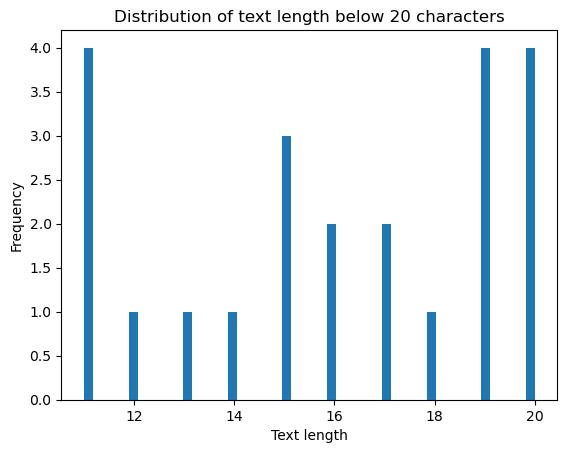

In [21]:
plt.hist(data['statement_length'], bins=50, range=[11, 20])
plt.title('Distribution of text length below 20 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [22]:
print(data[data['statement_length']<20])

              id        label            statement  \
470   12499.json   pants-fire     Crime is rising.   
709    5919.json        false          On abortion   
1014   8882.json    half-true          On abortion   
1071    630.json         true          On torture.   
2274   8086.json  mostly-true  I was filibustered.   
2940   1552.json        false    On reconciliation   
3481   3263.json        false  On high-speed rail.   
3520   1404.json    half-true  On abortion rights.   
3623  12175.json    half-true  Weve rebuilt China.   
6131   4493.json        false       Were bankrupt.   
6527   4297.json        false         On abortion.   
6759    995.json    half-true          On torture.   
7358   5927.json    half-true        On gun policy   
7638   6862.json        false     On sequestration   
7820   7931.json        false      On gay marriage   
8283  10987.json        false      On Common Core.   
8642   1647.json         true      On oil drilling   
8787   7493.json        fals

## From 20 to 100

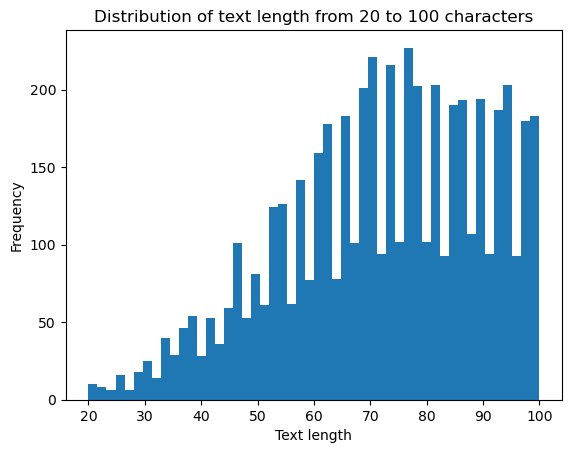

In [23]:
plt.hist(data['statement_length'], bins=50, range=[20, 100])
plt.title('Distribution of text length from 20 to 100 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [24]:
print(data[data['statement_length']==76]['statement'])

65       Transgender individuals in the U.S. have a 1-i...
186      Payday lenders profit from the poor by chargin...
204      Says Obama health reform law denies millions a...
360      Says Texas routinely gets a lot more federal s...
382      2008 was the deadliest year of the war (in Afg...
                               ...                        
9955     Says Carlos Beruff supported (Charlie) Crist e...
10053    We have had over 40 days this summer where it ...
10132    Brock Turners early release will be a regular ...
10185    Says Ted Cruz just flip-flopped about the pres...
10220    Says he and Mitt Romney agreed on tying minimu...
Name: statement, Length: 123, dtype: object


## Above 100 characters

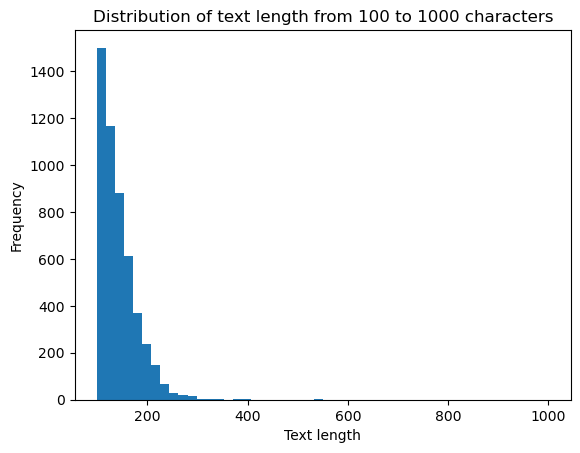

In [25]:
plt.hist(data['statement_length'], bins=50, range=[100, 1000])
plt.title('Distribution of text length from 100 to 1000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [26]:
print(data[data['statement_length']==100]['statement'])

102      Raising the minimum wage to $10.10 an hour, wo...
198      While our people work longer hours for lower w...
393      Under a proposed medical marijuana amendment i...
448      What the Arizona law does is make a state crim...
488      In the entire public school system in Camden l...
                               ...                        
9886     ﻿Says JoAnne Kloppenburgs side had a 3-to-1 mo...
9916     The president won the youth vote 3 to1, but hi...
10079    Tim Kaine reduced higher education funding by ...
10111    The Health Care and Education Reconciliation A...
10169    The top25 hedge fund managers (are) making mor...
Name: statement, Length: 96, dtype: object


## Above 1000 characters

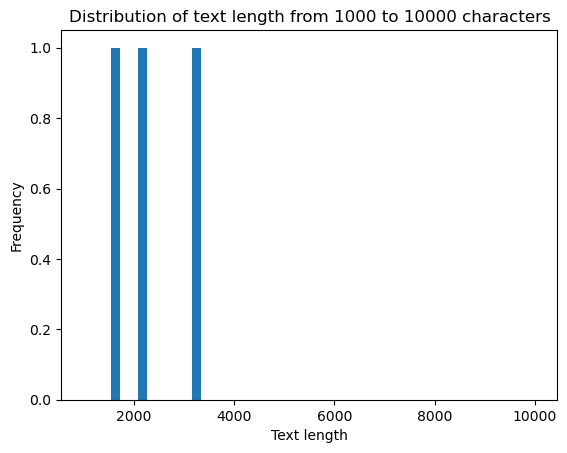

In [27]:
plt.hist(data['statement_length'], bins=50, range=[1000, 10000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Filter the DataFrame for examples where the text below 100 characters
long_texts = data[data['statement'].str.len() < 100]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
false          1127
mostly-true     977
half-true       965
true            858
barely-true     813
pants-fire      442
Name: count, dtype: int64


In [29]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[(data['statement'].str.len() >= 100) & (data['statement'].str.len() <= 1000)]
# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
half-true      1149
mostly-true     984
false           867
barely-true     841
true            817
pants-fire      397
Name: count, dtype: int64


In [30]:
# Filter the DataFrame for examples where the text below 100 characters
long_texts = data[data['statement'].str.len() > 1000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
mostly-true    1
true           1
false          1
Name: count, dtype: int64


## Correlation of Speaker's statement credit and 

In [31]:
# Tạo biến tổng số phát biểu
data['total_statements'] = data.iloc[:, 8:13].sum(axis=1)

# Tạo các biến tỷ lệ
data['barely_true_ratio'] = data['barely_true_counts'] / data['total_statements']
data['false_ratio'] = data['false_counts'] / data['total_statements']
data['half_true_ratio'] = data['half_true_counts'] / data['total_statements']
data['mostly_true_ratio'] = data['mostly_true_counts'] / data['total_statements']
data['pants_on_fire_ratio'] = data['pants_on_fire_counts'] / data['total_statements']
# Kiểm tra lại vài dòng đầu tiên sau khi thêm các biến mới
data.head()


,id,label,statement,subject,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,...,pants_on_fire_counts,context,speaker_length,statement_length,total_statements,barely_true_ratio,false_ratio,half_true_ratio,mostly_true_ratio,pants_on_fire_ratio
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.0,a mailer,12.0,82,1.0,0.000000,1.000000,0.000000,0.000000,0.000000
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.0,a floor speech.,14.0,141,2.0,0.000000,0.000000,0.500000,0.500000,0.000000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,9.0,Denver,12.0,105,473.0,0.147992,0.150106,0.338266,0.344609,0.019027
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,44.0,a news release,12.0,78,78.0,0.089744,0.243590,0.038462,0.064103,0.564103
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,2.0,an interview on CNN,13.0,54,65.0,0.230769,0.138462,0.307692,0.292308,0.030769


In [32]:
unique_labels = data['label'].unique()
print(unique_labels)

['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


In [33]:
# Tính tần suất của từng nhãn
label_counts = data['label'].value_counts()
print(label_counts)

label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64


In [34]:
# Cập nhật từ điển chuyển đổi để bao gồm tất cả các nhãn
label_to_numeric = {
    'pants-fire': 0,
    'false': 1,
    'half-true': 2,
    'mostly-true': 3,
    'true': 4,
    'barely-true': 5  # Giả sử 'barely-true' là nhãn mới mà bạn phát hiện ra
}

# Chuyển đổi nhãn thành số
data['label_numeric'] = data['label'].apply(lambda x: label_to_numeric.get(x, -1))  # -1 cho các giá trị không xác định

# Kiểm tra lại để đảm bảo chuyển đổi thành công
print(data[['label', 'label_numeric']].head())


         label  label_numeric
0        false              1
1    half-true              2
2  mostly-true              3
3        false              1
4    half-true              2


                     barely_true_ratio  false_ratio  half_true_ratio  \
barely_true_ratio             1.000000    -0.220219        -0.263869   
false_ratio                  -0.220219     1.000000        -0.362304   
half_true_ratio              -0.263869    -0.362304         1.000000   
mostly_true_ratio            -0.291740    -0.353415        -0.210985   
pants_on_fire_ratio          -0.159352    -0.065449        -0.248959   
label_numeric                 0.370530    -0.251824        -0.015871   

                     mostly_true_ratio  pants_on_fire_ratio  label_numeric  
barely_true_ratio            -0.291740            -0.159352       0.370530  
false_ratio                  -0.353415            -0.065449      -0.251824  
half_true_ratio              -0.210985            -0.248959      -0.015871  
mostly_true_ratio             1.000000            -0.288928       0.162051  
pants_on_fire_ratio          -0.288928             1.000000      -0.318056  
label_numeric                 0.1

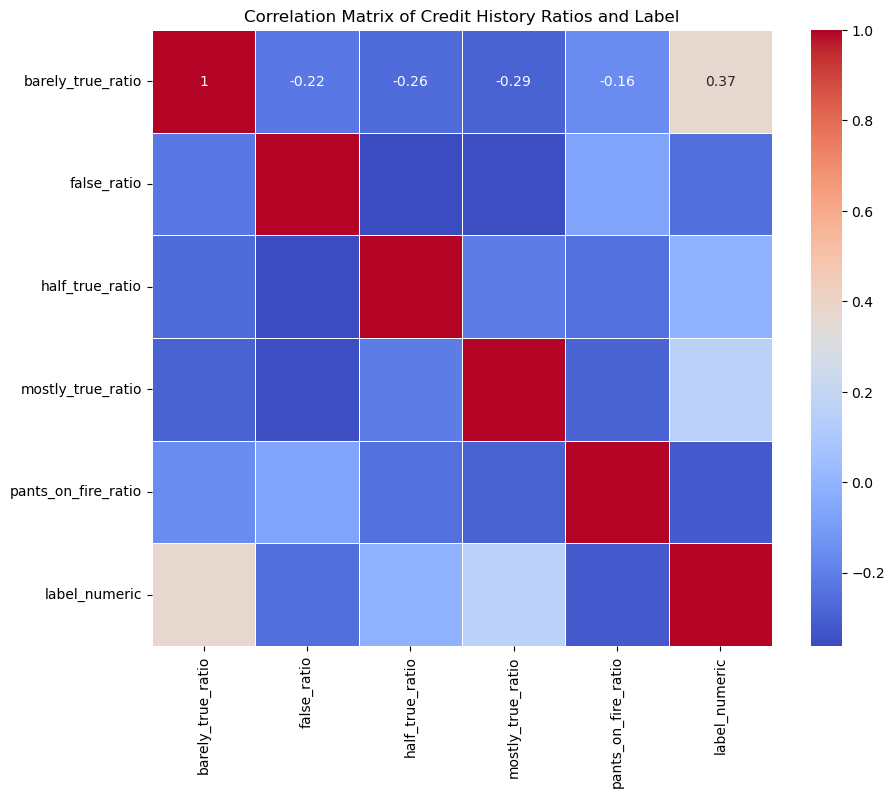

In [35]:
# Tính tương quan
correlation_matrix = data[['barely_true_ratio', 'false_ratio', 'half_true_ratio', 'mostly_true_ratio', 'pants_on_fire_ratio', 'label_numeric']].corr()
print(correlation_matrix)

# Biểu đồ nhiệt (heatmap) của ma trận tương quan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Credit History Ratios and Label')
plt.show()


In [36]:
def calculate_trustworthiness(row):
    total_statements = (
        row['barely_true_counts'] + row['false_counts'] + 
        row['half_true_counts'] + row['mostly_true_counts'] + 
        row['pants_on_fire_counts']
    )
    if total_statements == 0:
        return 0
    trustworthiness = (row['true_counts'] + row['mostly_true_counts']) / total_statements
    return trustworthiness

# Đảm bảo cột 'true_counts' được tính từ nhãn 'true'
data['true_counts'] = data['label'].apply(lambda x: 1 if x == 'true' else 0)

# Tính tổng các phát biểu theo người phát ngôn
speaker_group = data.groupby('speaker').sum().reset_index()

# Tính độ uy tín
speaker_group['trustworthiness'] = speaker_group.apply(calculate_trustworthiness, axis=1)

# Hiển thị độ uy tín
print(speaker_group[['speaker', 'trustworthiness']])

                              speaker  trustworthiness
0          18-percent-american-public         0.500000
1                 60-plus-association         0.000000
2                                AARP         1.000000
3     Arizona-Citizens-Defense-League         0.000000
4                         Ballesteros         0.000000
...                               ...              ...
2905               yvette-mcgee-brown         0.000000
2906                       zack-space         0.000000
2907                      zell-miller         0.666667
2908                  zephyr-teachout         0.000000
2909                      zoe-lofgren         1.000000

[2910 rows x 2 columns]
